In [2]:
import gensim.downloader as api
from numpy import dot
from numpy.linalg import norm
import numpy as np

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
model = api.load("glove-wiki-gigaword-100")  # 100d GloVe vectors


In [4]:
result = model.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

for word, similarity in result:
    print(f"{word}: {similarity:.3f}")

queen: 0.770
monarch: 0.684
throne: 0.676
daughter: 0.659
princess: 0.652


In [8]:
print(model.most_similar("past", topn=5))
print(model.most_similar("future", topn=5))

[('back', 0.7780070900917053), ('over', 0.7672088742256165), ('recent', 0.7591682076454163), ('far', 0.7555834054946899), ('through', 0.7535863518714905)]
[('possible', 0.7876505255699158), ('potential', 0.7394405603408813), ('current', 0.7346139550209045), ('change', 0.7342554330825806), ('our', 0.7288627624511719)]


In [ ]:
import numpy as np
from gensim.downloader import load
from sklearn.preprocessing import normalize

# Load model
model = load("glove-wiki-gigaword-100")

# Define antonym pairs
pairs = [
    ("future", "past"),
    ("futuristic", "historical"),
    ("modern", "vintage"),
    ("progressive", "traditional"),
    ("new", "old"),
    ("contemporary", "ancient"),
    ("cutting-edge", "conventional"),
    ("advanced", "customary"),
    ("tomorrow", "yesterday"),
    ("innovation", "heritage"),
]

# Compute direction vectors for each pair
diffs = []
for a, b in pairs:
    if a in model and b in model:
        diffs.append(model[a] - model[b])

# Average them
temporality_axis = np.mean(diffs, axis=0)

# Normalize
temporality_axis = normalize(temporality_axis.reshape(1, -1))[0]

# Function to get score
def temporality_score(word):
    if word not in model:
        return None
    vec = normalize(model[word].reshape(1, -1))[0]
    return float(np.dot(vec, temporality_axis))

# Example: see which words are most “future-like” or “past-like”
words = ["steam", "spaceship", "typewriter", "robot", "horse", "clock", "utopia", "memory", "decay", "digital", "candle", "quill", "phonograph"]
scores = {w: temporality_score(w) for w in words}

sorted(scores.items(), key=lambda x: x[1], reverse=True)


[('digital', 0.26360926032066345),
 ('utopia', 0.25353655219078064),
 ('robot', 0.19932927191257477),
 ('decay', 0.09750740975141525),
 ('spaceship', 0.09021341800689697),
 ('steam', 0.04852699115872383),
 ('quill', 0.046489860862493515),
 ('phonograph', -0.013200651854276657),
 ('memory', -0.10263989120721817),
 ('typewriter', -0.11172190308570862),
 ('clock', -0.13163815438747406),
 ('horse', -0.20635029673576355),
 ('candle', -0.24986371397972107)]

In [ ]:
#TIME ONLY!

import numpy as np
from gensim.downloader import load
from sklearn.preprocessing import normalize

# Load model
model = load("glove-wiki-gigaword-100")

# Define antonym pairs
pairs = [
    ("future", "past"),
    ("futuristic", "historical"),
    ("new", "old"),
    ("tomorrow", "yesterday"),
]

# Compute direction vectors for each pair
diffs = []
for a, b in pairs:
    if a in model and b in model:
        diffs.append(model[a] - model[b])
    ("modern", "vintage"),
# Average them
temporality_axis = np.mean(diffs, axis=0)

# Normalize
temporality_axis = normalize(temporality_axis.reshape(1, -1))[0]

# Function to get score
def temporality_score(word):
    if word not in model:
        return None
    vec = normalize(model[word].reshape(1, -1))[0]
    return float(np.dot(vec, temporality_axis))

# Example: see which words are most “future-like” or “past-like”
words = ["steam", "spaceship", "typewriter", "robot", "horse", "clock", "utopia", "memory", "pastoral", "digital", "farm", "goat", "agrarian", "synthetic", "neon", "circuitry", "urban", "rural"]
scores = {w: temporality_score(w) for w in words}

sorted(scores.items(), key=lambda x: x[1], reverse=True)


[('utopia', 0.30033180117607117),
 ('spaceship', 0.27668529748916626),
 ('robot', 0.26034775376319885),
 ('neon', 0.21110296249389648),
 ('circuitry', 0.2100609987974167),
 ('digital', 0.19332115352153778),
 ('synthetic', 0.1232532486319542),
 ('steam', 0.11223091185092926),
 ('urban', 0.03083464317023754),
 ('typewriter', -0.056322600692510605),
 ('horse', -0.08056753128767014),
 ('clock', -0.0862576887011528),
 ('agrarian', -0.08884959667921066),
 ('farm', -0.12151914834976196),
 ('rural', -0.1289946287870407),
 ('pastoral', -0.1458512842655182),
 ('goat', -0.15747515857219696),
 ('memory', -0.18799711763858795)]

In [ ]:
import numpy as np
from gensim.downloader import load
from sklearn.preprocessing import normalize

# Load GloVe model
model = load("glove-wiki-gigaword-100")

# Define antonym pairs
pairs = [
    ("future", "past"),
    ("futuristic", "historical"),
    ("new", "old"),
    ("tomorrow", "yesterday"),
]

# Compute direction vectors
diffs = []
for a, b in pairs:
    if a in model and b in model:
        diffs.append(model[a] - model[b])

temporality_axis = np.mean(diffs, axis=0)
temporality_axis = normalize(temporality_axis.reshape(1, -1))[0]

# Vectorized computation over entire vocab
all_words = model.index_to_key
all_vecs = normalize(model.vectors)

# Compute projection (dot product)
scores = np.dot(all_vecs, temporality_axis)

# Get top & bottom 20
top_future_idx = np.argsort(scores)[-20:][::-1]
top_past_idx = np.argsort(scores)[:20]

top_future = [(all_words[i], float(scores[i])) for i in top_future_idx]
top_past = [(all_words[i], float(scores[i])) for i in top_past_idx]

print("Most future-like words:")
for w, s in top_future:
    print(f"{w:15s} {s:.3f}")

print("\nMost past-like words:")
for w, s in top_past:
    print(f"{w:15s} {s:.3f}")


Most future-like words:
nextgen         0.488
guffman         0.484
mid-2013        0.473
moots           0.464
next-generation 0.451
a3xx            0.451
unconditioned   0.445
wjb             0.444
assistive       0.444
contingencies   0.443
forseeable      0.441
wbis            0.439
greener         0.431
s/s             0.429
shakspere       0.428
rlv             0.423
nuclear-free    0.423
bioenergy       0.422
transhab        0.420
ikaros          0.418

Most past-like words:
recovered       -0.388
roman           -0.387
traced          -0.385
buried          -0.384
sherds          -0.383
fallen          -0.382
graves          -0.382
belonged        -0.381
past            -0.377
centuries       -0.377
24-year         -0.373
grandfather     -0.372
35-year         -0.371
desecrated      -0.369
molested        -0.366
survived        -0.365
32-year         -0.363
45-year         -0.362
13-year         -0.360
documented      -0.360


In [ ]:
import numpy as np
from gensim.downloader import load
from sklearn.preprocessing import normalize

# Load GloVe model
model = load("glove-wiki-gigaword-100")

# Define antonym pairs
pairs = [
    ("future", "past"),
    ("futuristic", "historical"),
    ("modern", "vintage"),
    ("progressive", "traditional"),
    ("new", "old"),
    ("contemporary", "ancient"),
    ("cutting-edge", "conventional"),
    ("advanced", "customary"),
    ("tomorrow", "yesterday"),
    ("innovation", "heritage"),
]

# Compute direction vectors
diffs = []
for a, b in pairs:
    if a in model and b in model:
        diffs.append(model[a] - model[b])

temporality_axis = np.mean(diffs, axis=0)
temporality_axis = normalize(temporality_axis.reshape(1, -1))[0]

# Vectorized computation over entire vocab
all_words = model.index_to_key
all_vecs = normalize(model.vectors)

# Compute projection (dot product)
scores = np.dot(all_vecs, temporality_axis)

# Get top & bottom 10
top_future_idx = np.argsort(scores)[-10:][::-1]
top_past_idx = np.argsort(scores)[:10]

top_future = [(all_words[i], float(scores[i])) for i in top_future_idx]
top_past = [(all_words[i], float(scores[i])) for i in top_past_idx]

print("Most future-like words:")
for w, s in top_future:
    print(f"{w:15s} {s:.3f}")

print("\nMost past-like words:")
for w, s in top_past:
    print(f"{w:15s} {s:.3f}")


Most future-like words:
entrepreneurship 0.520
innovation      0.510
innovative      0.501
cutting-edge    0.495
market-oriented 0.467
mechatronics    0.466
r&d             0.454
next-generation 0.452
collaborative   0.448
problem-solving 0.448

Most past-like words:
gravestones     -0.477
tombstones      -0.468
ancestral       -0.424
headstones      -0.413
perce           -0.411
desecrated      -0.410
buried          -0.407
graves          -0.404
ruins           -0.404
customary       -0.397


In [ ]:
neighbors = model.most_similar("utopia", topn=100)


In [ ]:
neighbors

[('utopian', 0.6094252467155457),
 ('dystopia', 0.5654035806655884),
 ('purgatory', 0.521998941898346),
 ('agrarian', 0.5160527229309082),
 ('rebirth', 0.5144199132919312),
 ('paradise', 0.5116329193115234),
 ('multiverse', 0.4950501620769501),
 ('bolivarian', 0.4852754473686218),
 ('fairyland', 0.47938498854637146),
 ('eternity', 0.46052324771881104),
 ('nouveaux', 0.4585018754005432),
 ('classless', 0.4563767910003662),
 ('suburbia', 0.45286300778388977),
 ('dreamscape', 0.45206013321876526),
 ('shearwater', 0.45048558712005615),
 ('wonderland', 0.44786497950553894),
 ('anarchy', 0.4443652033805847),
 ('despotism', 0.444074809551239),
 ('dreamland', 0.43815937638282776),
 ('hergé', 0.43659693002700806),
 ('feudalism', 0.4358367323875427),
 ('dak', 0.4350197911262512),
 ('populism', 0.43391281366348267),
 ('apocalypse', 0.43324747681617737),
 ('dystopian', 0.43267714977264404),
 ('bedlam', 0.4313122630119324),
 ('internationalism', 0.4308634400367737),
 ('serfdom', 0.43013691902160645

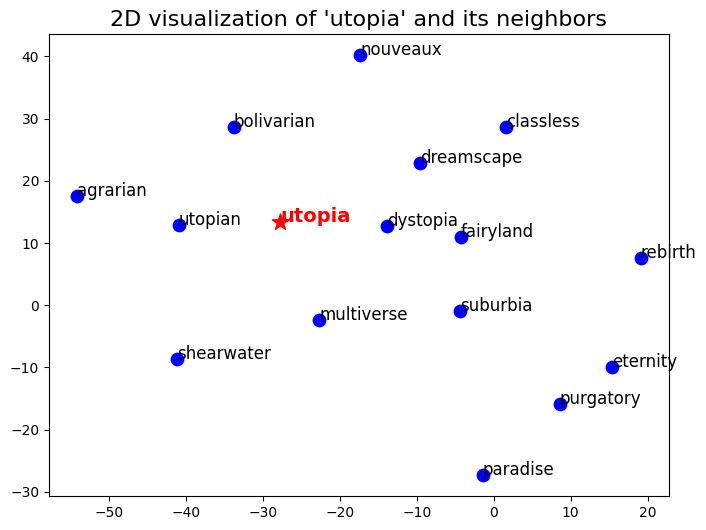

In [ ]:
target_word = "utopia"
neighbors = model.most_similar(target_word, topn=15)
words_to_plot = [target_word] + [n for n, _ in neighbors]
vectors = np.array([model[w] for w in words_to_plot])

# t-SNE to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))

for i, word in enumerate(words_to_plot):
    x, y = vectors_2d[i]
    if word == target_word:
        plt.scatter(x, y, color='red', s=150, marker='*')  # standout style
        plt.text(x+0.01, y+0.01, word, fontsize=14, fontweight='bold', color='red')
    else:
        plt.scatter(x, y, color='blue', s=80)
        plt.text(x+0.01, y+0.01, word, fontsize=12)

plt.title(f"2D visualization of '{target_word}' and its neighbors", fontsize=16)
plt.show()

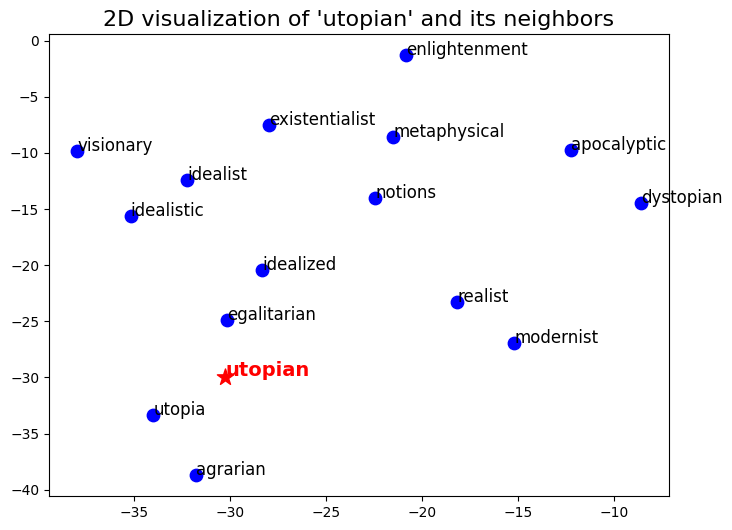

In [ ]:
target_word = "utopian"
neighbors = model.most_similar(target_word, topn=15)
words_to_plot = [target_word] + [n for n, _ in neighbors]
vectors = np.array([model[w] for w in words_to_plot])

# t-SNE to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))

for i, word in enumerate(words_to_plot):
    x, y = vectors_2d[i]
    if word == target_word:
        plt.scatter(x, y, color='red', s=150, marker='*')  # standout style
        plt.text(x+0.01, y+0.01, word, fontsize=14, fontweight='bold', color='red')
    else:
        plt.scatter(x, y, color='blue', s=80)
        plt.text(x+0.01, y+0.01, word, fontsize=12)

plt.title(f"2D visualization of '{target_word}' and its neighbors", fontsize=16)
plt.show()

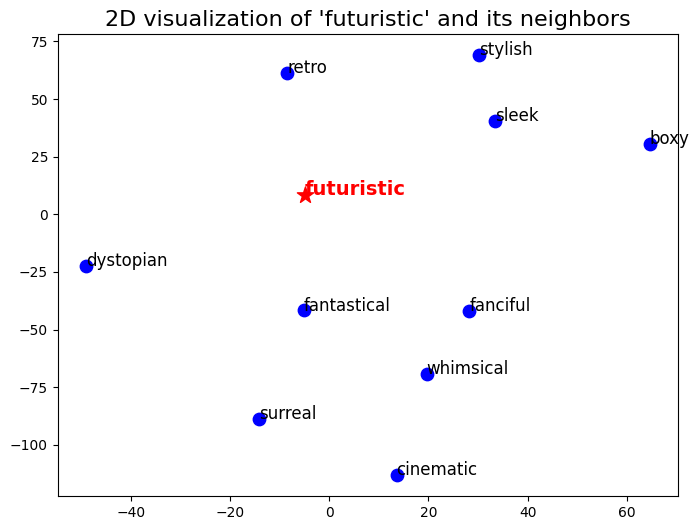

In [ ]:
target_word = "futuristic"
neighbors = model.most_similar(target_word, topn=10)
words_to_plot = [target_word] + [n for n, _ in neighbors]
vectors = np.array([model[w] for w in words_to_plot])

# t-SNE to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(8,6))

for i, word in enumerate(words_to_plot):
    x, y = vectors_2d[i]
    if word == target_word:
        plt.scatter(x, y, color='red', s=150, marker='*')  # standout style
        plt.text(x+0.01, y+0.01, word, fontsize=14, fontweight='bold', color='red')
    else:
        plt.scatter(x, y, color='blue', s=80)
        plt.text(x+0.01, y+0.01, word, fontsize=12)

plt.title(f"2D visualization of '{target_word}' and its neighbors", fontsize=16)
plt.show()

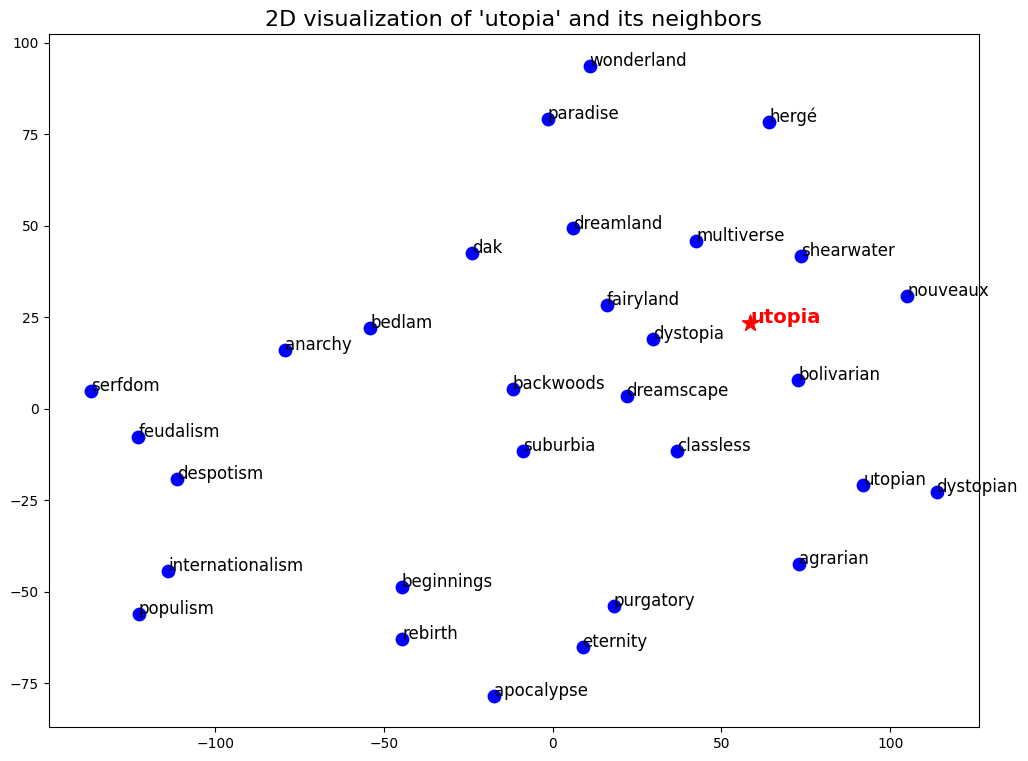

In [ ]:
target_word = "utopia"
neighbors = model.most_similar(target_word, topn=30)
words_to_plot = [target_word] + [n for n, _ in neighbors]
vectors = np.array([model[w] for w in words_to_plot])

# t-SNE to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
vectors_2d = tsne.fit_transform(vectors)

# Plot
plt.figure(figsize=(12, 9))

for i, word in enumerate(words_to_plot):
    x, y = vectors_2d[i]
    if word == target_word:
        plt.scatter(x, y, color='red', s=150, marker='*')  # standout style
        plt.text(x+0.01, y+0.01, word, fontsize=14, fontweight='bold', color='red')
    else:
        plt.scatter(x, y, color='blue', s=80)
        plt.text(x+0.01, y+0.01, word, fontsize=12)

plt.title(f"2D visualization of '{target_word}' and its neighbors", fontsize=16)
plt.show()

In [ ]:
target_word = "utopian"
neighbors = model.most_similar(target_word, topn=15)
neighbor_words = [n for n, _ in neighbors]

# Reference words
references = ["future", "past"]

# Function to calculate cosine similarity / distance
def cosine_distance(vec1, vec2):
    return 1 - np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

# Build a table
data = []
for w in neighbor_words:
    vec_w = model[w]
    row = {"word": w}
    for ref in references:
        row[f"dist_to_{ref}"] = cosine_distance(vec_w, model[ref])
    data.append(row)

df = pd.DataFrame(data)

# Sort by distance to 'future' as an example
df_sorted = df.sort_values(by="dist_to_future")
df_sorted

,word,dist_to_future,dist_to_past
10,notions,0.666269,0.713973
13,visionary,0.698427,0.844347
8,enlightenment,0.799869,0.776802
6,apocalyptic,0.801072,0.854098
1,dystopian,0.812085,1.037930
5,idealistic,0.816542,0.850560
11,agrarian,0.845822,0.831270
3,metaphysical,0.852814,0.927425
12,realist,0.854351,0.887828
2,utopia,0.856124,0.990524


NameError: name 'model' is not defined